In [7]:
### Benjamin Tollison ###
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import sympy as sp
from IPython.display import Latex, Math, display
from sympy import (
    Eq,
    Function,
    Matrix,
    cos,
    cosh,
    exp,
    integrate,
    lambdify,
    pi,
    sin,
    sinh,
    symbols,
)
from decimal import Decimal
from sympy.solvers.pde import pdsolve
from sympy.solvers.solveset import linsolve
def displayEquations(LHS,RHS):
    left = sp.latex(LHS)
    right = sp.latex(RHS)
    display(Math(left + '=' + right))
    np.set_printoptions(suppress=True)
def displayVariable(variable:str,RHS):
    left = sp.latex(symbols(variable))
    right = sp.latex(RHS)
    display(Math(left + '=' + right))
def displayVariableWithUnits(variable:str,RHS,units):
    left = sp.latex(symbols(variable))
    right = sp.latex(RHS)
    latexUnit = sp.latex(symbols(units))
    display(Math(left + '=' + right + '\\;' +'\\left['+ latexUnit + '\\right]'))
def format_scientific(number:float):
    a = '%E' % number
    return a.split('E')[0].rstrip('0').rstrip('.') + 'E' + a.split('E')[1]
deg2rad = np.pi/180
rad2deg = 180/np.pi

,C_Tmeasured,C_Pmeasured,C_P,C_T
0,0.000006,0.000197,NaN,NaN
1,0.001049,0.000226,NaN,NaN
2,0.002376,0.000282,NaN,NaN
3,0.004076,0.000405,NaN,NaN
4,0.005581,0.000555,NaN,NaN


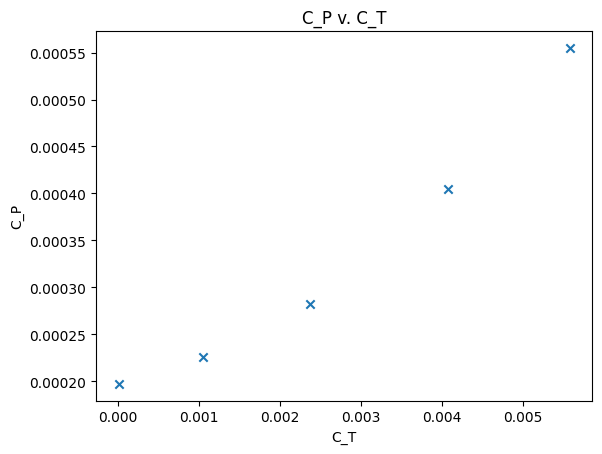

In [8]:
rotor_performance = {
  'C_Tmeasured':[6.0000e-06, 0.0010490,0.0023760, 0.0040760, 0.0055810],
  'C_Pmeasured':[.000197,0.000226, 0.000282, 0.000405, 0.000555],
  'C_P':['NaN' for i in range(5)],
  'C_T':['NaN' for i in range(5)]
}
display(pd.DataFrame(rotor_performance))
del rotor_performance['C_P']
del rotor_performance['C_T']
plt.scatter(rotor_performance['C_Tmeasured'],rotor_performance['C_Pmeasured'],marker='x',label='measured')
plt.title('C_P v. C_T')
plt.xlabel('C_T')
plt.ylabel('C_P')
plt.show()

,C_Tmeasured,C_Pmeasured,C_P
0,0.000006,0.000197,0.000002
1,0.001049,0.000226,0.000002
2,0.002376,0.000282,0.000003
3,0.004076,0.000405,0.000006
4,0.005581,0.000555,0.000009


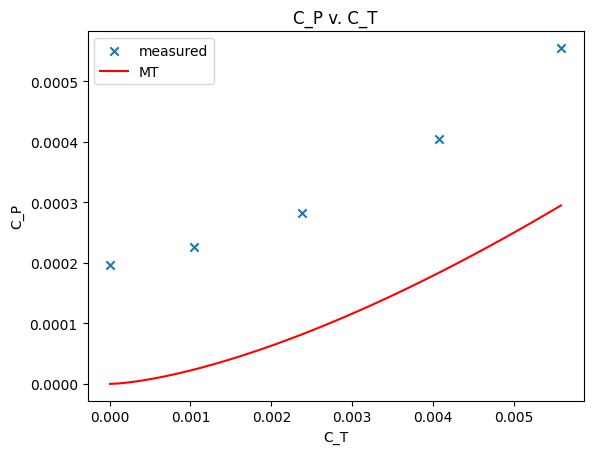

In [9]:
def CoefficientPowerMT(coefficient_of_thrust):
  return coefficient_of_thrust**1.5 / 2**0.5
coefficient_of_thrust_values = np.linspace(float(rotor_performance['C_Tmeasured'][0]),rotor_performance['C_Tmeasured'][-1])
coefficient_of_power_momentum_theory = [CoefficientPowerMT(i) for i in np.linspace(0,coefficient_of_thrust_values[-1])]
rotor_performance['C_P'] = [CoefficientPowerMT(i) for i in rotor_performance['C_Pmeasured']]
display(pd.DataFrame(rotor_performance))
plt.scatter(rotor_performance['C_Tmeasured'],rotor_performance['C_Pmeasured'],marker='x',label='measured')
plt.plot(coefficient_of_thrust_values,coefficient_of_power_momentum_theory,label='MT',color='r')
plt.title('C_P v. C_T')
plt.xlabel('C_T')
plt.ylabel('C_P')
plt.legend()
plt.show()

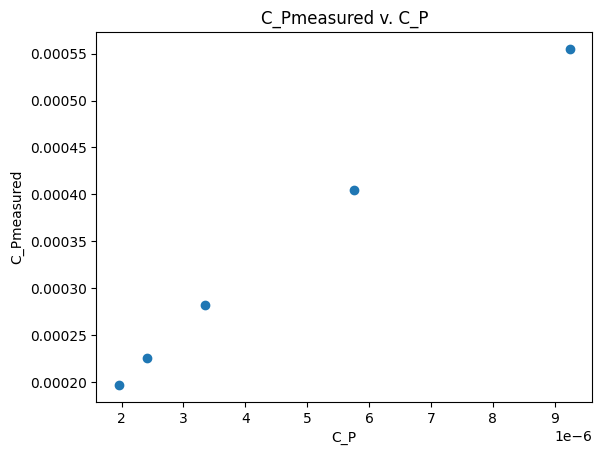

In [10]:
plt.scatter(rotor_performance['C_P'],rotor_performance['C_Pmeasured'],marker='o',label='measured')
plt.title('C_Pmeasured v. C_P')
plt.xlabel('C_P')
plt.ylabel('C_Pmeasured')
plt.show()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

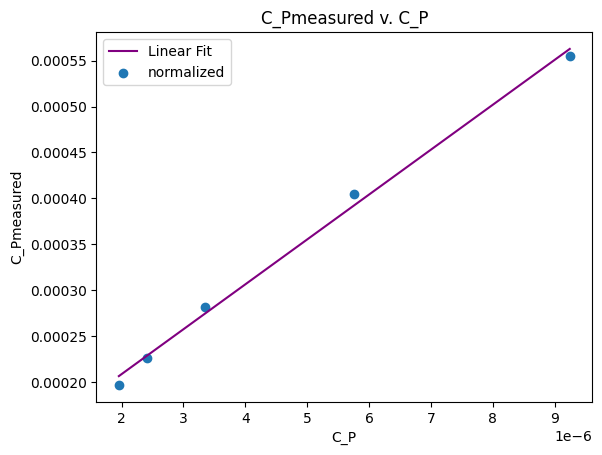

In [13]:
kappa, C_P0, r_value, p_value, std_error = scipy.stats.linregress(rotor_performance['C_P'],rotor_performance['C_Pmeasured'])
linear_fit = [float(kappa*i+C_P0) for i in rotor_performance['C_P']]
displayVariable('\\kappa',kappa)
displayVariable('C_{P0}',C_P0)
plt.plot(rotor_performance['C_P'],linear_fit,label='Linear Fit',color='purple')
plt.scatter(rotor_performance['C_P'],rotor_performance['C_Pmeasured'],marker='o',label='normalized')
plt.title('C_Pmeasured v. C_P')
plt.xlabel('C_P')
plt.ylabel('C_Pmeasured')
plt.legend()
plt.show()

,C_Tmeasured,C_Pmeasured,C_P,C_P_MMT
0,0.000006,0.000197,0.000002,0.000197
1,0.001049,0.000226,0.000002,0.000223
2,0.002376,0.000282,0.000003,0.000287
3,0.004076,0.000405,0.000006,0.000399
4,0.005581,0.000555,0.000009,0.000521


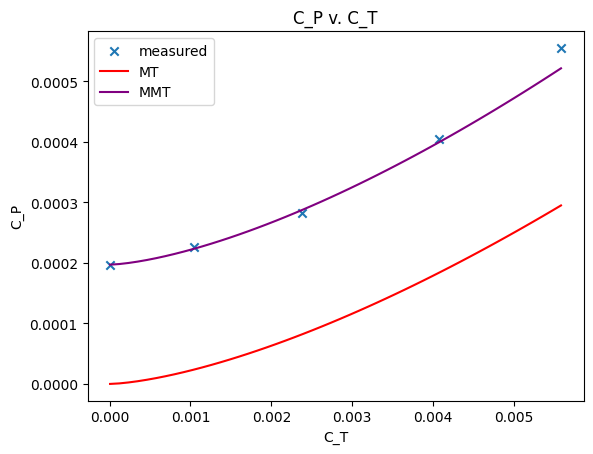

In [20]:
def ModifiedMomentumTheory(coefficient_of_thrust):
  return 1.1*(coefficient_of_thrust**1.5/2**0.5) + rotor_performance['C_Pmeasured'][0]
rotor_performance['C_P_MMT'] = [float(ModifiedMomentumTheory(i)) for i in rotor_performance['C_Tmeasured']]
display(pd.DataFrame(rotor_performance))
plt.scatter(rotor_performance['C_Tmeasured'],rotor_performance['C_Pmeasured'],marker='x',label='measured')
plt.plot(coefficient_of_thrust_values,coefficient_of_power_momentum_theory,label='MT',color='r')
plt.plot(coefficient_of_thrust_values,ModifiedMomentumTheory(coefficient_of_thrust_values),label='MMT',color='purple')
plt.title('C_P v. C_T')
plt.xlabel('C_T')
plt.ylabel('C_P')
plt.legend()
plt.show()

### 3)
$$ \text{DL} = \frac{T}{\sigma} $$

In [28]:
rotor_radius = 4.0 # m
gross_weight = 1360.5 # kg
rotor_tip_speed = 207.3 # m/s
torque = 205 # kW
rotor_area = np.pi*rotor_radius**2
disk_loading = gross_weight/rotor_area
displayVariable('DL',disk_loading)
# ideal_power_loading = gross_weight*rotor_tip_speed
ideal_power_loading = gross_weight**1.5 / (2*1.225*rotor_area)**0.5
displayVariable('PL_{ideal}',ideal_power_loading)
coefficient_of_thrust = gross_weight / (1.225*rotor_area*rotor_tip_speed**2)
displayVariable('C_T',coefficient_of_thrust)


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>